Introduction to the Creative Applications of Deep Learning course offered by Kadenze. 

Working through examples in https://github.com/pkmital/CADL/blob/master/session-0/session-0.ipynb
to understand how to work with images.

In [113]:
import os
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize

In [114]:
IMAGE_DIR = 'img_align_celeba'

In [115]:
# Download images from the provided celeba dataset. 
def download_celeba_files(imgdir):
    if not os.path.exists(imgdir):
        os.mkdir(imgdir)
    
    for i in range(1, 101):
        fname = '000%03d.jpg' % i
        fpath = os.path.join(imgdir, fname)
        if os.path.exists(fpath):
            continue
        url = 'https://s3.amazonaws.com/cadl/celeb-align/' + fname
        print(url)
        urllib.request.urlretrieve(url, fpath)

In [116]:
# Display the specified image.
def show_image(filename):
    img = plt.imread(filename)
    plt.imshow(img)

In [117]:
# Crops an image to square.
# Determines the longer side and makes it equal to the shorter side
# by taking away equal amounts from either end of the longer side.
def crop_to_square(img):
    # img height is greater than the width
    if img.shape[0] > img.shape[1]:
        diff = img.shape[0] - img.shape[1]
        if diff % 2 == 0:
            crop = img[diff // 2:-diff // 2, :]
        else:
            crop = img[max(0, diff // 2 + 1):min(-diff // 2, -1,), :]
    # image width is greater than height
    elif img.shape[1] > img.shape[0]:
        diff = img.shape[1] - img.shape[0]
        if diff % 2 == 0:
            crop = img[:, diff // 2:-diff // 2]
        else:
            crop = img[:, max(0, diff // 2 + 1):min(-diff // 2, -1)]
    else:
        crop = img
    return crop

In [118]:
# Crops the image, keeping the same aspect ratio.
# Takes in a param between 0 and 1 that specifies the crop percentage 
def crop_keep_aspect(img, crop_pct):
    if crop_pct <= 0 or crop_pct >= 1:
        return img
    r = int(img.shape[0] * crop_pct) // 2
    c = int(img.shape[1] * crop_pct) // 2
    return img[r:-r, c:-c]

In [119]:
# Preprocess all the images in the specified directory.
def preprocess_images(imgdir):
    imgs = []
    files = os.listdir(imgdir)
    files = [os.path.join(imgdir, f) for f in files if '.jpg' in f]
    for f in files:
        img = plt.imread(f)
        # crop to square
        sq = crop_to_square(img)
        # crop a certain percent of the image
        crop = crop_keep_aspect(sq, 0.2)
        # resize to 64x64
        rsz = resize(crop, (64, 64))
        imgs.append(rsz)
    return imgs

In [124]:
# download and preprocess all images and hold the data in a numpy array
download_celeba_files(IMAGE_DIR)
imgs = preprocess_images(IMAGE_DIR)
data = np.array(imgs)
print(len(imgs))
print(imgs[0].shape)
print(data.shape)

/home/harini/cadl/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


100
(64, 64, 3)
(100, 64, 64, 3)


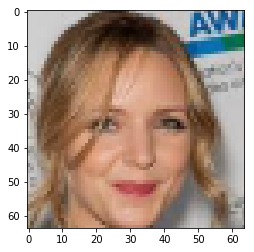

In [125]:
# display a random image in the set
plt.imshow(imgs[np.random.randint(100)])